<a href="https://colab.research.google.com/github/frankyehtw/hello-world/blob/master/%E3%80%8Cex07_dropout0_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()      # 上傳檔案到 Colab
!ls

Saving pkgo_city66_class5_v1.csv to pkgo_city66_class5_v1.csv
pkgo_city66_class5_v1.csv  sample_data


In [ ]:
import numpy as np
np.random.seed(1337)

my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)

X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

y_train = my_data[:,200]
y_train = y_train.astype('int')

import tensorflow
Y_train = tensorflow.keras.utils.to_categorical(y_train,5)

from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)

# set the size of mini-batch and number of epochs
batch_size = 16
epochs = 100

# Import keras to build a DL model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Step 1: 從 model.layers 引入 Dropout 

In [ ]:
from tensorflow.keras.layers import Dropout

###  Step 2: 請幫下方的 model 加入適當的 Dropout layer

In [ ]:
# Step 2 HERE

# Building a model with dropout = 0.45
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
#model_adam.add(Dropout(0.45))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
#model_adam.add(Dropout(0.45))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))


In [ ]:

# Setting optimizer as Adam
from tensorflow.keras.optimizers import  Adam
model_adam.compile(loss= 'categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

# Fit models and use validation_split=0.1
history_adam = model_adam.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=0,
                              shuffle=True,
                              validation_split=0.1)

loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('accuracy')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_accuracy')

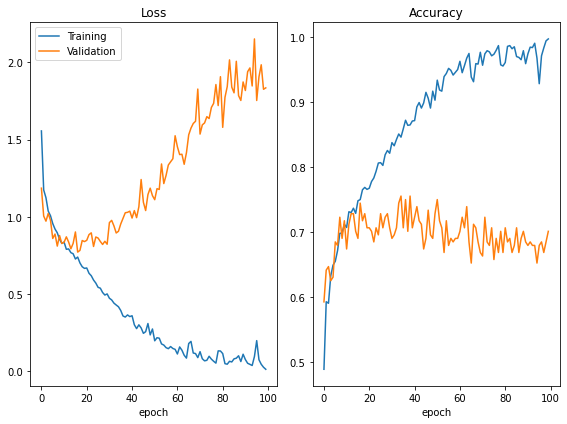

In [ ]:
# Visualize the loss and accuracy of both models
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.tight_layout()
plt.savefig('08_dropout.png',dpi=300,format='png')
plt.show()
